<a href="https://colab.research.google.com/github/bpiaple/TensorFlow-Course/blob/main/05_Introduction_to_tensorflow_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to covolutional neural networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data.

## Get the data

The image we're working with are from 101 datasets: https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

In [9]:
# Make some import
import tensorflow as tf
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

In [10]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-07-26 00:39:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.207, 74.125.132.207, 74.125.201.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   107MB/s    in 1.0s    

2024-07-26 00:39:29 (107 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data



In [5]:
!ls pizza_steak


test  train


In [6]:
!ls -s pizza_steak/

total 8
4 test	4 train


In [7]:
import os

# Walk throught pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [8]:
!ls -la pizza_steak/test

total 32
drwxr-xr-x 4 root root  4096 Jul 25 00:24 .
drwxr-xr-x 4 root root  4096 Jul 25 00:24 ..
drwxr-xr-x 2 root root 12288 Jul 25 00:24 pizza
drwxr-xr-x 2 root root 12288 Jul 25 00:24 steak


In [9]:
# Another way to find our how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))

print(num_steak_images_train, num_steak_images_test)

750 250


To visualize our images, first let's get the class names programmatically

In [60]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [11]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  return img

Image shape: (384, 512, 3)


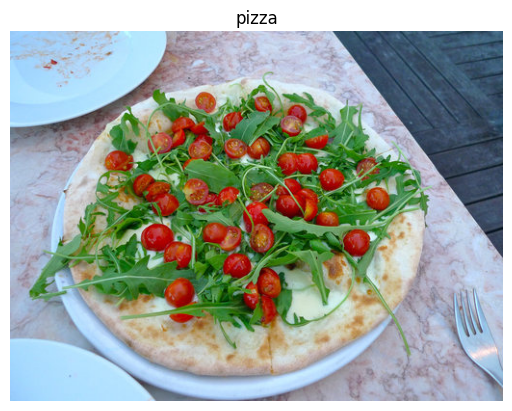

In [12]:
img = view_random_image("pizza_steak/train/", "pizza")
print(f"Image shape: {img.shape}") # show the shape of the image

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[151, 202, 247],
        [152, 203, 248],
        [153, 204, 249],
        ...,
        [ 66, 101, 131],
        [ 63,  98, 126],
        [ 60,  95, 123]],

       [[151, 202, 247],
        [151, 202, 247],
        [151, 202, 247],
        ...,
        [ 67, 104, 133],
        [ 63, 100, 127],
        [ 60,  97, 124]],

       [[151, 202, 247],
        [150, 201, 246],
        [150, 201, 246],
        ...,
        [ 63, 102, 131],
        [ 61, 100, 129],
        [ 58,  97, 126]],

       ...,

       [[147, 201, 248],
        [149, 203, 250],
        [150, 204, 251],
        ...,
        [133, 150, 170],
        [131, 147, 162],
        [131, 145, 158]],

       [[148, 202, 249],
        [149, 203, 250],
        [150, 204, 251],
        ...,
        [132, 149, 167],
        [131, 147, 162],
        [130, 147, 157]],

       [[148, 202, 249],
        [149, 203, 250],
        [149, 203, 250],
        ...,
        [131, 146, 16

In [14]:
img.shape

(384, 512, 3)

In [15]:
img/255.

array([[[0.59215686, 0.79215686, 0.96862745],
        [0.59607843, 0.79607843, 0.97254902],
        [0.6       , 0.8       , 0.97647059],
        ...,
        [0.25882353, 0.39607843, 0.51372549],
        [0.24705882, 0.38431373, 0.49411765],
        [0.23529412, 0.37254902, 0.48235294]],

       [[0.59215686, 0.79215686, 0.96862745],
        [0.59215686, 0.79215686, 0.96862745],
        [0.59215686, 0.79215686, 0.96862745],
        ...,
        [0.2627451 , 0.40784314, 0.52156863],
        [0.24705882, 0.39215686, 0.49803922],
        [0.23529412, 0.38039216, 0.48627451]],

       [[0.59215686, 0.79215686, 0.96862745],
        [0.58823529, 0.78823529, 0.96470588],
        [0.58823529, 0.78823529, 0.96470588],
        ...,
        [0.24705882, 0.4       , 0.51372549],
        [0.23921569, 0.39215686, 0.50588235],
        [0.22745098, 0.38039216, 0.49411765]],

       ...,

       [[0.57647059, 0.78823529, 0.97254902],
        [0.58431373, 0.79607843, 0.98039216],
        [0.58823529, 0

## An end-to-end example

Let's build a covolutional neural networks to find patterns in images of food.

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the model
* Evaluate the model

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing the data
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and validation data paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Setup the train and validation
train_data = train_datagen.flow_from_directory(train_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                shuffle=True)
test_data = valid_datagen.flow_from_directory(test_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
# Build a CNN model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Create a model
model_1 = Sequential([
  layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(pool_size=2, padding="valid"),
  layers.Conv2D(10, 3, activation="relu"),
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPool2D(pool_size=2, padding="valid"),
  layers.Flatten(),
  layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [16]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 203ms/step - loss: 0.5938 - accuracy: 0.6667 - val_loss: 0.4439 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4882 - accuracy: 0.7700 - val_loss: 0.3857 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 7s 138ms/step - loss: 0.4079 - accuracy: 0.8153 - val_loss: 0.3788 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4136 - accuracy: 0.8160 - val_loss: 0.3446 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 7s 147ms/step - loss: 0.3422 - accuracy: 0.8553 - val_loss: 0.3351 - val_accuracy: 0.8540


In [17]:
# Evaluate the model
model_1.evaluate(test_data)


16/16 [==============================] - 1s 87ms/step - loss: 0.3351 - accuracy: 0.8540


[0.335130900144577, 0.8539999723434448]

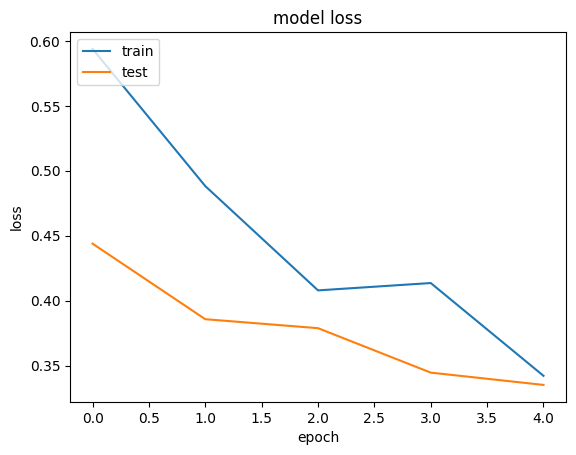

In [18]:
# Plot the loss curves
import matplotlib.pyplot as plt
plt.plot(history_1.history["loss"])
plt.plot(history_1.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [19]:
# make some predictions
preds = model_1.predict(test_data)
preds

16/16 [==============================] - 1s 81ms/step


array([[0.00952134],
       [0.07238884],
       [0.02599443],
       [0.07324686],
       [0.8683459 ],
       [0.99330246],
       [0.74365556],
       [0.01211776],
       [0.04163048],
       [0.9978751 ],
       [0.66585314],
       [0.18956268],
       [0.5410862 ],
       [0.12925099],
       [0.32564008],
       [0.2715749 ],
       [0.11844157],
       [0.3880183 ],
       [0.6331625 ],
       [0.10057086],
       [0.8897933 ],
       [0.95676214],
       [0.13662764],
       [0.8905001 ],
       [0.7659843 ],
       [0.6444669 ],
       [0.98366207],
       [0.8426815 ],
       [0.9371638 ],
       [0.98845005],
       [0.6545476 ],
       [0.9305506 ],
       [0.070118  ],
       [0.9093346 ],
       [0.76144725],
       [0.29645848],
       [0.25859258],
       [0.73407334],
       [0.75071037],
       [0.731371  ],
       [0.15234862],
       [0.5041433 ],
       [0.29636368],
       [0.9493585 ],
       [0.03176093],
       [0.94989574],
       [0.23687395],
       [0.968

In [20]:
len(train_data), len(test_data)

(47, 16)

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've build in a porevious section

In [22]:
# Set the seed
tf.random.set_seed(42)

# Create the model
model_2 = Sequential([
    layers.Flatten(input_shape=(224, 224, 3)),
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
    ])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [23]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 141ms/step - loss: 4.1967 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [24]:
# Get the summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despire having 20x more parameters than our CNN, model_2 performs very bad...

In [25]:
# Set the seed
tf.random.set_seed(42)

# Create the model (same as above)
model_3 = Sequential([
  layers.Flatten(input_shape=(224, 224, 3)),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(100, activation="relu"),
  layers.Dense(1, activation="sigmoid")
  ])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 9s 163ms/step - loss: 4.1512 - accuracy: 0.5820 - val_loss: 0.6187 - val_accuracy: 0.7500
Epoch 2/20
47/47 [==============================] - 5s 110ms/step - loss: 0.9048 - accuracy: 0.6627 - val_loss: 0.6156 - val_accuracy: 0.7640
Epoch 3/20
47/47 [==============================] - 7s 140ms/step - loss: 0.6006 - accuracy: 0.7433 - val_loss: 0.8282 - val_accuracy: 0.5680
Epoch 4/20
47/47 [==============================] - 5s 108ms/step - loss: 0.6225 - accuracy: 0.7333 - val_loss: 0.6021 - val_accuracy: 0.7060
Epoch 5/20
47/47 [==============================] - 6s 136ms/step - loss: 0.5807 - accuracy: 0.7387 - val_loss: 0.4500 - val_accuracy: 0.7880
Epoch 6/20
47/47 [==============================] - 5s 112ms/step - loss: 0.5238 - accuracy: 0.7673 - val_loss: 0.6719 - val_accuracy: 0.7180
Epoch 7/20
47/47 [==============================] - 6s 129ms/step - loss: 0.5530 - accuracy: 0.7460 - val_loss: 0.4619 - val_accuracy: 0.7840
Epoch 

In [26]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Evaluate the model
model_3.evaluate(test_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.4427 - accuracy: 0.7780


[0.4426983594894409, 0.777999997138977]

## Binary classification: Let's break it down

1. Become one with data
2. Preprocess the data (prepare our data for our model)
3. Create a model (build a CNN)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters
7. Repeat until satisfied

### 1. Become one with data

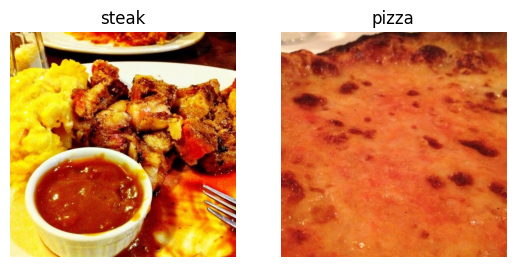

In [28]:
# Visualize data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")
plt.axis("off")
plt.show()

### 2. Preprocess the data (prepare it for the model)

In [29]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data that is processed together.

It does this for a couple of reasons:

1. **Efficiency**: Processing the entire dataset at once might exceed the memory capacity. Batches allow you to break down the data into smaller, manageable chunks that can be processed efficiently.

2. **Faster Convergence**: By updating the model's weights after each batch, you introduce more frequent updates, potentially leading to faster convergence compared to updating only after seeing the entire dataset.

3. **Generalization**: Training on batches introduces a level of stochasticity, as the model sees different subsets of data in each batch. This can help the model generalize better to unseen data and reduce overfitting.

4. **Hardware Utilization**: Modern hardware, like GPUs, are optimized for parallel processing. Batches allow you to leverage this by processing multiple samples simultaneously, leading to faster training times.

In [30]:
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [31]:
# Load in our image data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
train_data[0][0].shape

(32, 224, 224, 3)

In [33]:
# Get a sample of the train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [34]:
images[0].shape

(224, 224, 3)

### 3. Create the baseline model of our CNN model


In [36]:
# Set the seed
tf.random.set_seed(42)

# Create the model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [37]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 142ms/step - loss: 0.5575 - accuracy: 0.7267 - val_loss: 0.4255 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4424 - accuracy: 0.8060 - val_loss: 0.3874 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3641 - accuracy: 0.8460 - val_loss: 0.3636 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3000 - accuracy: 0.8813 - val_loss: 0.3613 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.2193 - accuracy: 0.9220 - val_loss: 0.3624 - val_accuracy: 0.8280


In [38]:
# Get a summary of the model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 29160)            

In [39]:
54*54*10

29160

In [45]:
from sklearn.metrics import confusion_matrix

# Assuming 'model' is your trained model and 'test_data' is your test data
y_pred = model_4.predict(test_data)

y_pred = np.argmax(y_pred, axis=1) # Convert probabilities to class labels

y_true = test_data.labels  # Assuming 'test_data' has labels attribute

cm = confusion_matrix(y_true, y_pred)
print(cm)

16/16 [==============================] - 2s 130ms/step
[[250   0]
 [250   0]]


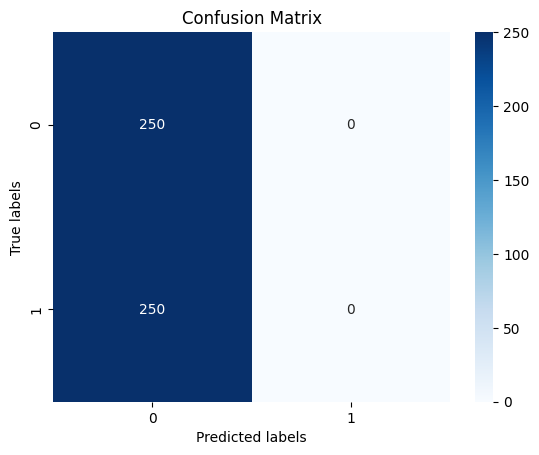

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cm' is your confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 5. Evaluating our model

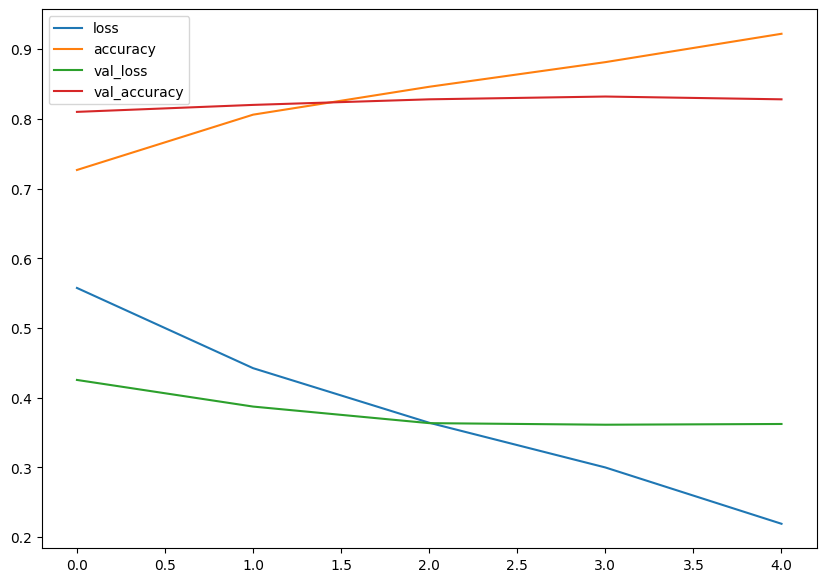

In [46]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))
plt.show()


In [28]:
# Plot the validation and training curves separately

def plot_cuves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

> When a model's **validation loss** starts to increase, it's likely overfitting of the training data. This means, it's learning the patterns in the training data too well and not generalizing well to new data.


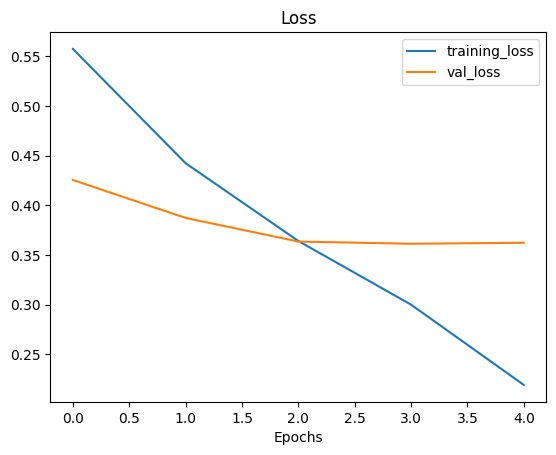

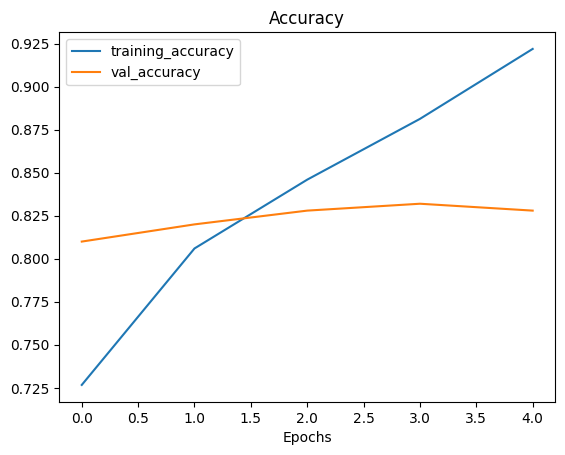

In [52]:
# Plot loss and accuracy curves for model_4

plot_cuves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the basesine by overfitting
2. Reduce overfitting

Way to reduce overfitting:
* **Get More Data**: The best way to combat overfitting is to train your model on more data. This helps the model learn a more generalized representation of the underlying patterns.
* **Data Augmentation**: Artificially increase the size of your training dataset by applying transformations like rotations, flips, crops, and color adjustments to your existing images.
* **Feature Selection**: Identify the most important features in your dataset and use only those for training. This can reduce the complexity of the model and prevent it from learning noise.
* **Regularization**: Add penalty terms to the loss function during training. This discourages the model from assigning excessively large weights to any particular feature.





In [54]:
# Create the model

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding="valid"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [55]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 133ms/step - loss: 0.5778 - accuracy: 0.7173 - val_loss: 0.4953 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4989 - accuracy: 0.7693 - val_loss: 0.4354 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4607 - accuracy: 0.7973 - val_loss: 0.4341 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4056 - accuracy: 0.8353 - val_loss: 0.3595 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.3899 - accuracy: 0.8287 - val_loss: 0.3353 - val_accuracy: 0.8560


In [57]:
model_4.summary(), model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 29160)            

(None, None)

In [58]:
31261/8861

3.5279313847195577

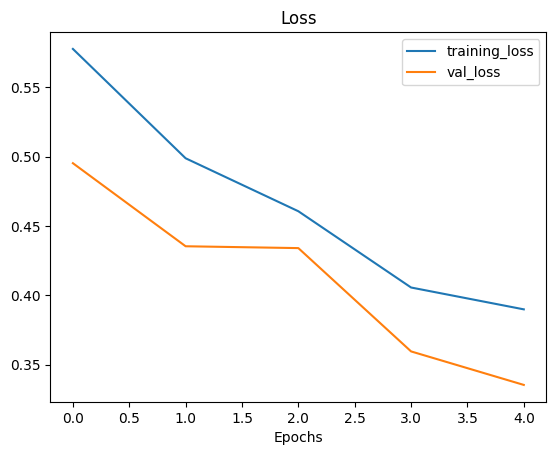

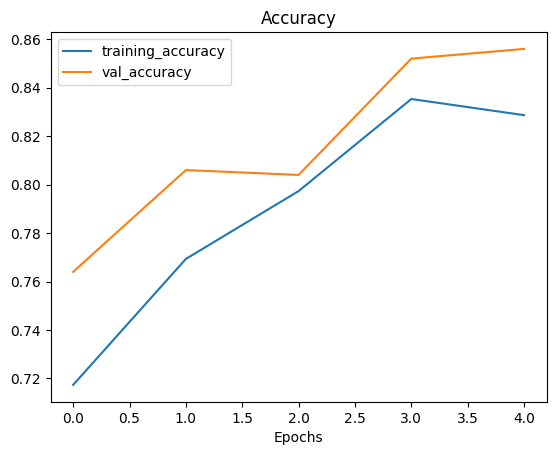

In [56]:
# Plot the cuves for model_5
plot_cuves(history_5)

### Opening our bag tricks to improve our model

In [2]:
import tensorflow as tf

In [21]:
# Create ImageDataGenerator training and validation data generators
from tensorflow.keras import layers

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [20]:
train_data_new = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                             image_size=(224, 224),
                                                             batch_size=32,
                                                             class_names=["pizza", "steak"],
                                                             shuffle=False)
test_data_new = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            image_size=(224, 224),
                                                            batch_size=32,
                                                            class_names=["pizza", "steak"],
                                                            shuffle=False)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [22]:
# Import data and augment it from training directory

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               shuffle=True)

# Create non augmented data batches
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(224, 224),
  layers.Rescaling(1./255)
])

In [68]:
train_data = data_augmentation

In [26]:
# Set the seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(10, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(10, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(10, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [27]:
# Fit the model
history_6 = model_6.fit(train_data_new,
                        epochs=5,
                        steps_per_epoch=len(train_data_new),
                        validation_data=test_data_new,
                        validation_steps=len(test_data_new))

Epoch 1/5
47/47 [==============================] - 67s 1s/step - loss: 0.6388 - accuracy: 0.6287 - val_loss: 0.5421 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 62s 1s/step - loss: 0.5027 - accuracy: 0.7727 - val_loss: 0.4299 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 64s 1s/step - loss: 0.4742 - accuracy: 0.7773 - val_loss: 0.3787 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 63s 1s/step - loss: 0.4754 - accuracy: 0.7787 - val_loss: 0.3749 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 62s 1s/step - loss: 0.4562 - accuracy: 0.7967 - val_loss: 0.3734 - val_accuracy: 0.8260


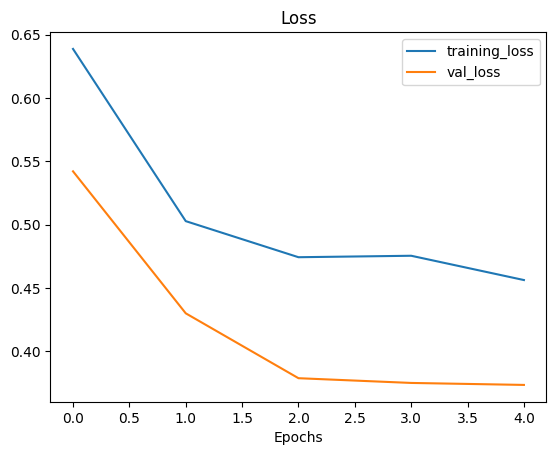

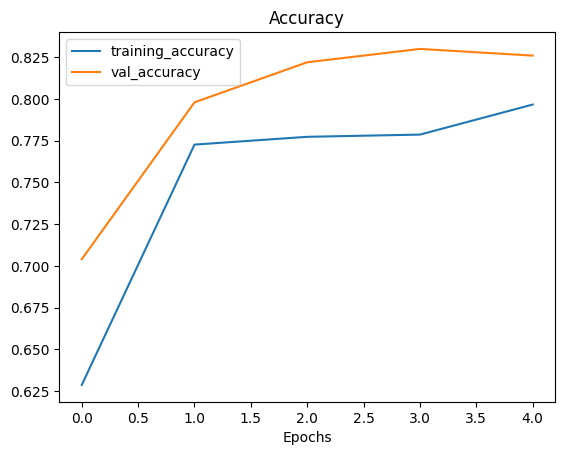

In [30]:
# Plot the cuves of the model_6

plot_cuves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) onn it and see what happends.

In [31]:

train_data_shuffle = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                             image_size=(224, 224),
                                                             batch_size=32,
                                                             class_names=["pizza", "steak"],
                                                             shuffle=True)

test_data_new_shuffle = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            image_size=(224, 224),
                                                            batch_size=32,
                                                            class_names=["pizza", "steak"],
                                                            shuffle=True)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [36]:
# Create the model

data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(224, 224),
  layers.Rescaling(1./255)
])

model_7 = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(10, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(10, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [40]:
# Fit the model
history_7 = model_7.fit(train_data_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_shuffle),
                        validation_data=test_data_new_shuffle,
                        validation_steps=len(test_data_new_shuffle))

Epoch 1/5
47/47 [==============================] - 66s 1s/step - loss: 0.6564 - accuracy: 0.5907 - val_loss: 0.5447 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 68s 1s/step - loss: 0.5421 - accuracy: 0.7467 - val_loss: 0.4428 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.5082 - accuracy: 0.7593 - val_loss: 0.4429 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 83s 2s/step - loss: 0.4896 - accuracy: 0.7713 - val_loss: 0.3953 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 90s 2s/step - loss: 0.4726 - accuracy: 0.7793 - val_loss: 0.3783 - val_accuracy: 0.8440


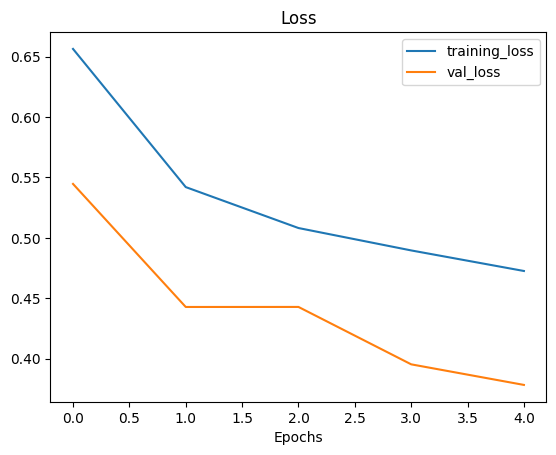

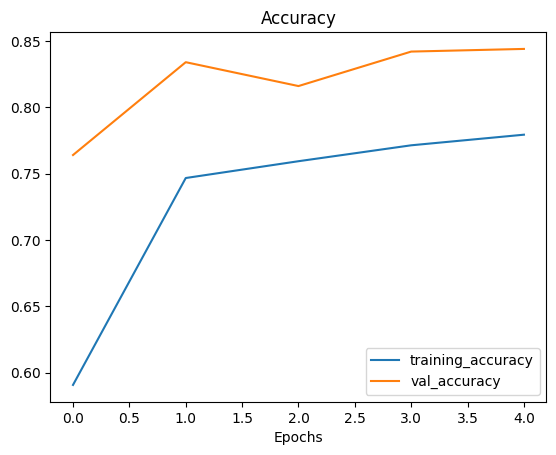

In [43]:
# Plot the cuves of the model_7

plot_cuves(history_7)

In [41]:
model_7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                 

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are few things we could try to continue to improve our model:

* Increase the number of model layers
* Increase the number of filters in the convolutional layers
* Add more data augmentation techniques
* Add more regularization techniques
* Add more dropout layers
* Train for longer
* Find the ideal learning rate
* Get more data
* Use **Transfer learning**

## Making a prediction with our model on our own data

In [61]:
# Classes we've been using so far
print(class_names)

['pizza' 'steak']


--2024-07-25 01:50:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.5’

03-steak.jpeg.5     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2024-07-25 01:50:55 (27.1 MB/s) - ‘03-steak.jpeg.5’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

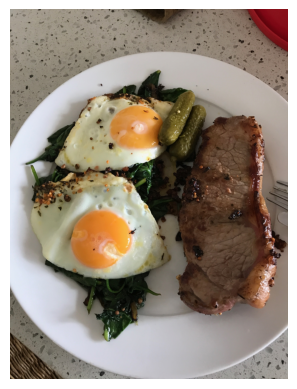

In [110]:
# View our image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [111]:
# Check image shape
steak.shape, steak

((4032, 3024, 3),
 array([[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],
 
        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],
 
        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],
 
        ...,
 
        [[154, 132, 111],
         [142, 121, 100],
         [101,  80,  59],
         ...,
         [164, 155, 148],
         [152, 141, 135],
         [140, 129, 123]],
 
        [[141, 119,  96],
         [138, 118,  94],
         [106,  85,  64],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],
 
        [[148, 126, 102],
         [148, 128, 103],
         [114,  93,  72],
         ...,
         [

In [112]:
# Create a function to reshape images
def reshape_image(image):
  image = image/255.
  return tf.expand_dims(image, axis=0)

In [113]:
steak = reshape_image(steak)
steak.shape

TensorShape([1, 4032, 3024, 3])

In [114]:
pred = model_7.predict(steak)
pred

1/1 [==============================] - 1s 825ms/step


array([[0.9800722]], dtype=float32)

Looks like our custum image is being put through our model, however, it currently outputs a probability

In [83]:
# Remind of class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [94]:
# We can use argmax to find the predicted class
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [55]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=(224, 224))
  img = tf.expand_dims(img, axis=0)
  img = img/255.

  # Make a prediction
  pred = model.predict(img)

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img[0])
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  return pred



1/1 [==============================] - 0s 48ms/step


array([[0.9800655]], dtype=float32)

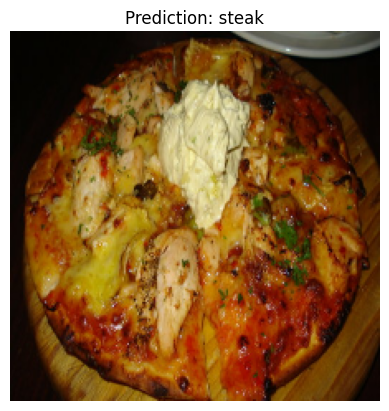

In [119]:
pred_and_plot(model_7, "/content/pizza_steak/train/pizza/121834.jpg", class_names)

# Multiclass image classification

1. Become one with data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baselines)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

## 1. Import the data

In [16]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-07-26 00:40:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.207, 74.125.201.207, 74.125.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.3MB/s    in 8.2s    

2024-07-26 00:40:50 (60.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [17]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")



There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [18]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [19]:
# Let's get subdirectories
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [20]:
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [21]:
# Visualize a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img


Image shape: (287, 512, 3)


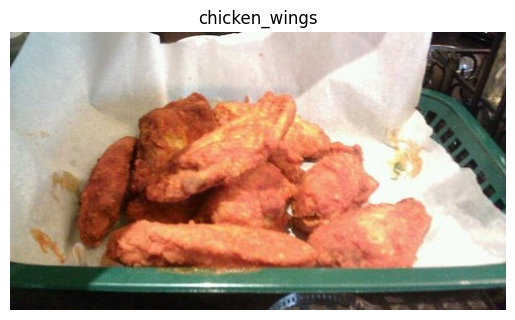

In [22]:
image = view_random_image(train_dir, class_names[1])

## 2. Preprocess the data

In [23]:
from keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(train_dir,
                                          image_size=(224, 224),
                                          batch_size=32,
                                          label_mode="categorical",
                                          shuffle=True)

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(224, 224),
                                         batch_size=32,
                                         label_mode="categorical",
                                         shuffle=False)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
# 3. Create a CNN model

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

# Set the seed
tf.random.set_seed(42)

# Create the rescaling and resizing layer, then a data augmentation layer
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(224, 224),
  layers.Rescaling(1./255)
])

# Create the model
model_8 = Sequential([
    resize_and_rescale,
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    Flatten(),
    Dense(10, activation="softmax")
])

# COmpile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [31]:
# Fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.50 * len(test_data)))

Epoch 1/5
235/235 [==============================] - 21s 75ms/step - loss: 2.1919 - accuracy: 0.1888 - val_loss: 2.0506 - val_accuracy: 0.2540
Epoch 2/5
235/235 [==============================] - 18s 74ms/step - loss: 2.0087 - accuracy: 0.2789 - val_loss: 2.1530 - val_accuracy: 0.1739
Epoch 3/5
235/235 [==============================] - 18s 74ms/step - loss: 1.6794 - accuracy: 0.4319 - val_loss: 2.0130 - val_accuracy: 0.2981
Epoch 4/5
235/235 [==============================] - 19s 79ms/step - loss: 1.1581 - accuracy: 0.6175 - val_loss: 2.3911 - val_accuracy: 0.2796
Epoch 5/5
235/235 [==============================] - 17s 71ms/step - loss: 0.5955 - accuracy: 0.8111 - val_loss: 3.2619 - val_accuracy: 0.2516


## 5. Evaluate the model

In [32]:
# Evaluate the model
model_8.evaluate(test_data)

79/79 [==============================] - 4s 55ms/step - loss: 3.0816 - accuracy: 0.2928


[3.0816173553466797, 0.29280000925064087]

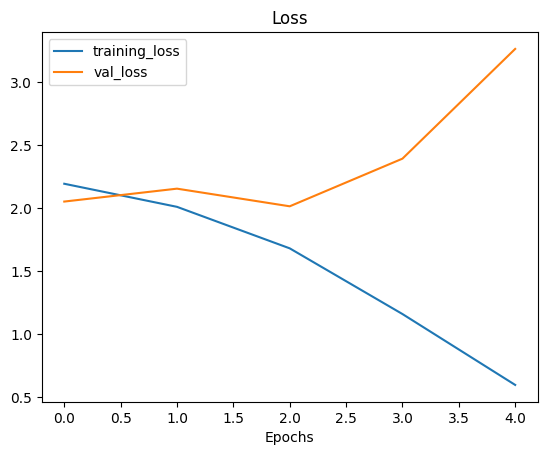

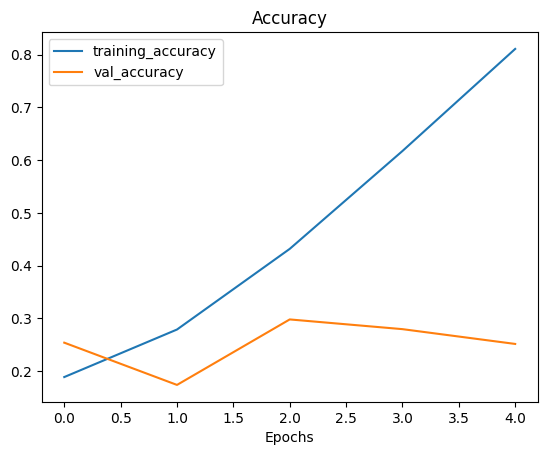

In [33]:
plot_cuves(history_8)

Our model is overfitting the training set

### 6. Adjust the model hyperparameters (to beat the baseline model and reduce overfitting)

In [34]:
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [37]:
# Create a model_9 with by removing 2 convolutional layers

model_9 = Sequential([
    resize_and_rescale,
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding="valid"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [39]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.50 * len(test_data)))

Epoch 1/5
235/235 [==============================] - 20s 73ms/step - loss: 2.1403 - accuracy: 0.2489 - val_loss: 1.8584 - val_accuracy: 0.3261
Epoch 2/5
235/235 [==============================] - 17s 71ms/step - loss: 1.8044 - accuracy: 0.3831 - val_loss: 1.9284 - val_accuracy: 0.3085
Epoch 3/5
235/235 [==============================] - 21s 86ms/step - loss: 1.5788 - accuracy: 0.4715 - val_loss: 1.9995 - val_accuracy: 0.2965
Epoch 4/5
235/235 [==============================] - 17s 70ms/step - loss: 1.2348 - accuracy: 0.5984 - val_loss: 1.9875 - val_accuracy: 0.3269
Epoch 5/5
235/235 [==============================] - 17s 72ms/step - loss: 0.8090 - accuracy: 0.7513 - val_loss: 2.4630 - val_accuracy: 0.2941


In [40]:
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 29160)           

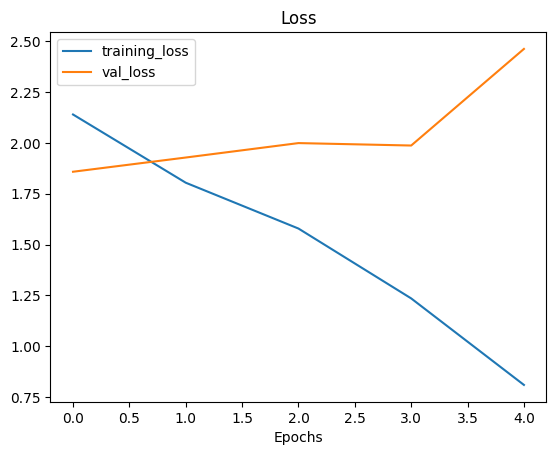

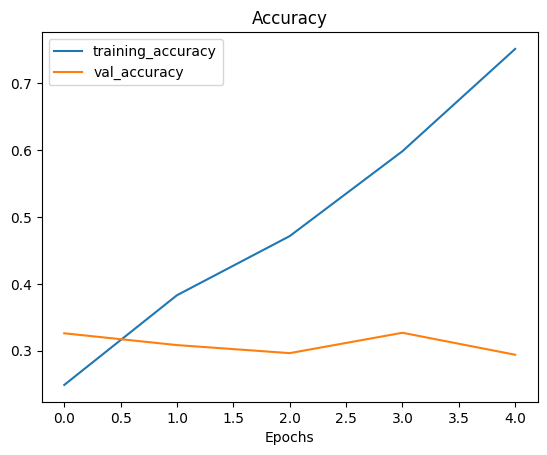

In [41]:
# Check our loss and accuracy curves
plot_cuves(history_9)

### Trying with Data Augmentation

In [24]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

# Create the model
model_10 = Sequential([
    resize_and_rescale,
    data_augmentation,
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2, padding="valid"),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_10.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [25]:
# Fit the model
history_10 = model_10.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.50 * len(test_data)))


Epoch 1/5
235/235 [==============================] - 589s 2s/step - loss: 2.2629 - accuracy: 0.1575 - val_loss: 2.3367 - val_accuracy: 0.0409
Epoch 2/5
235/235 [==============================] - 582s 2s/step - loss: 2.1475 - accuracy: 0.2160 - val_loss: 2.1741 - val_accuracy: 0.1931
Epoch 3/5
235/235 [==============================] - 573s 2s/step - loss: 2.0763 - accuracy: 0.2649 - val_loss: 2.0354 - val_accuracy: 0.2796
Epoch 4/5
235/235 [==============================] - 581s 2s/step - loss: 2.0393 - accuracy: 0.2831 - val_loss: 1.9999 - val_accuracy: 0.2804
Epoch 5/5
235/235 [==============================] - 569s 2s/step - loss: 1.9911 - accuracy: 0.3037 - val_loss: 2.0077 - val_accuracy: 0.2708


In [26]:
model_10.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 sequential_5 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                      

In [27]:
model_10.evaluate(test_data), model_8.evaluate(test_data)

79/79 [==============================] - 65s 824ms/step - loss: 2.3026 - accuracy: 0.1084


([1.9220986366271973, 0.31839999556541443],
 [2.302565336227417, 0.10840000212192535])

In [28]:
model_10.save("model_10.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 7. Repreat until satisfied

### Making a prediction with our model

In [29]:
# Remind of class names
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [30]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2024-07-26 01:35:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2024-07-26 01:35:07 (27.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

--2024-07-26 01:35:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response...

In [38]:
import tensorflow as tf

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255
  return img

In [48]:
# Create a function to reshape images
def reshape_image(image):
  img = mpimg.imread(image)
  img = img/255.
  return tf.expand_dims(img, axis=0)

In [84]:
# Reconfig pred and plot function

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  return pred



1/1 [==============================] - 0s 37ms/step


array([[7.2726357e-04, 3.6748510e-02, 3.5449625e-03, 3.1162681e-02,
        2.5944766e-02, 7.7392220e-02, 1.4352519e-03, 3.7499182e-02,
        7.3862302e-01, 4.6922106e-02]], dtype=float32)

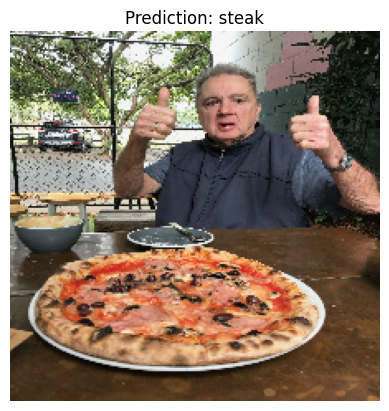

In [85]:
# Make a prediction on custom images
pred_and_plot(model_10, "/content/03-pizza-dad.jpeg",list(class_names))

1/1 [==============================] - 0s 41ms/step


(array([[7.1950542e-04, 3.6661938e-02, 3.5069454e-03, 3.1282861e-02,
         2.5839502e-02, 7.6014929e-02, 1.4131811e-03, 3.6659062e-02,
         7.4191433e-01, 4.5987714e-02]], dtype=float32),)

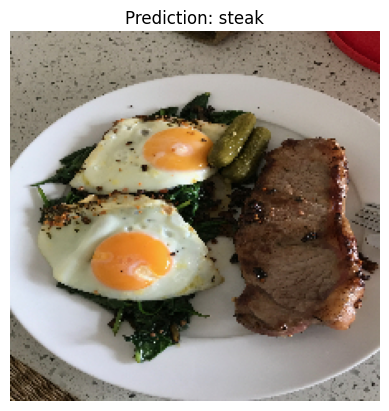

In [86]:

pred_and_plot(model_10, "/content/03-steak.jpeg", list(class_names)),

1/1 [==============================] - 0s 41ms/step


(array([[7.2054745e-04, 3.6674157e-02, 3.5302117e-03, 3.1084171e-02,
         2.5861261e-02, 7.7483058e-02, 1.4303788e-03, 3.7607007e-02,
         7.3858267e-01, 4.7026496e-02]], dtype=float32),)

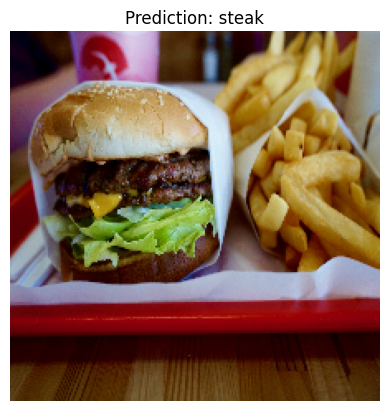

In [87]:

pred_and_plot(model_10, "/content/03-hamburger.jpeg", list(class_names)),